# Gaussian Processes

[Visualisierung](https://distill.pub/2019/visual-exploration-gaussian-processes/)

In [99]:
import numpy as np
import scipy
from sklearn.gaussian_process.kernels import ExpSineSquared

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [100]:
sns.set_style("darkgrid")
np.random.seed(42)

## Visualizations

In [101]:
def plot_kernel(ax, Sigma):
    im = plt.imshow(Sigma, cmap=cm.YlGnBu)
    cbar = fig.colorbar(
        im, fraction=0.045, pad=0.05)
    cbar.ax.set_ylabel('$k(x,x)$', fontsize=10)
    ax.set_xlabel('x', fontsize=13)
    ax.set_ylabel('x', fontsize=13)
    ticks = list(range(xlim[0], xlim[1]+1))
    ax.set_xticks(np.linspace(0, len(Sigma)-1, len(ticks)))
    ax.set_yticks(np.linspace(0, len(Sigma)-1, len(ticks)))
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks)
    ax.grid(False)


def plot_sampled_functions(ax, X, samples, X_train=None, y_train=None, Sigma=None, mu=None, ylim=[-4,4]):
    for i in range(samples.shape[0]):
        ax.plot(X, samples[i], linestyle='-')
    if X_train is not None and y_train is not None:
        ax.plot(X_train, y_train, 'o', markersize=6)
    if Sigma is not None:
        sigma = np.sqrt(np.diag(Sigma))
        if mu is None:
            mu = np.zeros(Sigma.shape[0])
        ax.fill_between(X.flat, mu - 2 * sigma, mu + 2 * sigma, color='red', alpha=0.15)
        ax.plot(X.flat, mu - 2 * sigma, '-', color='red')
        ax.plot(X.flat, mu + 2 * sigma, '-', color='red')
        ax.plot(X.flat, mu, '--', color='blue')
    ax.set_xlim([-6, 6])
    ax.set_ylim(ylim)

## Kernel functions

In [102]:
def rbf(k_1, k_2):
    sq_norm = -0.5 * scipy.spatial.distance.cdist(k_1, k_2, 'sqeuclidean')
    return np.exp(sq_norm)

def linear(k_1, k_2, sig=0.5, sig_b=0.4, offset=0):
    return sig_b * sig_b + sig * sig * (k_1 - offset) @ (k_2 - offset).T

def periodic(k1, k2, sigma=1, p=2*np.pi, l=1):
    kernel = ExpSineSquared(length_scale=l, periodicity=p)
    return kernel(k1, k2)

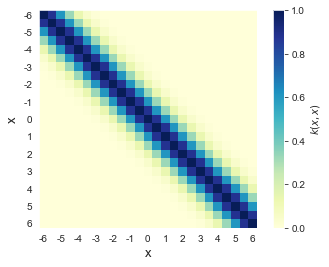

In [103]:
xlim = (-6, 6)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
Sigma = rbf(X, X)
fig, ax = plt.subplots()
plot_kernel(ax, Sigma)
plt.show()

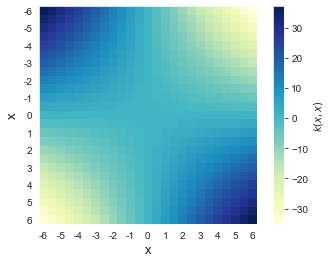

In [104]:
Sigma = linear(X, X, 1, 1, 0)
fig, ax = plt.subplots()
plot_kernel(ax, Sigma)
plt.show()

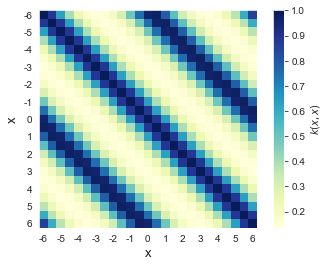

In [105]:
Sigma = periodic(X, X)
fig, ax = plt.subplots()
plot_kernel(ax, Sigma)
plt.show()

## Prior

In [18]:
# Prior with RBF Kernel

In [19]:
# Prior with Linear Kernel

## Posterior

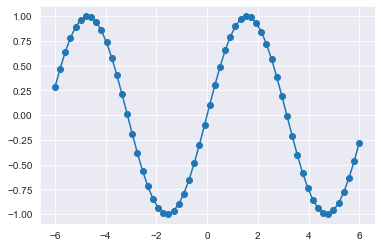

In [108]:
f_sin = lambda x: (np.sin(x)).flatten()

n_train = 6
n_test = 60
n_sample_functions = 5
domain = (-6, 6)

X_train = np.random.uniform(domain[0]+2, domain[1]-2, size=(n_train, 1))
y_train = f_sin(X_train)

X_test = np.linspace(domain[0], domain[1], n_test).reshape(-1, 1)

fig, ax = plt.subplots()
ax.plot(X_test, f_sin(X_test), linestyle='-', marker='o')
plt.show()

In [20]:
# GP


In [21]:
# Posterior with RBF Kernel

In [22]:
# Posterior with Periodic Kernel

## Dealing with noise

In [23]:
# GP with noise


In [24]:
# Posterior with RBF and noise